## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## 1. Изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

Загружаем файл в переменную games.

In [2]:
games = pd.read_csv('/datasets/games.csv', sep = '\t', delimiter = ',')

Посмотрим на загруженные данные.

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Описание данных.  
В таблице имеются следующие столбцы:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Посмотрим на тип данных в таблице.

In [4]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Отметим, что в столбце User_Score отражается некорректный тип данных. Необходимо изменить его на float64.

Посмотрим на количество пустых значений по каждому столбцу.

In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Имеются пропуски в данных с рейтингами. Необходимо посмотреть можно ли заменить их средней, нулем или удалить такие строки совсем.

Посмотрим на статистики данных.

In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Отмечается большая доля нулевых значений по продажам в различных регионах. Необходимо обратить на это внимание и понять природу это явления.

In [7]:
games.duplicated().sum()

0

Дублирующие строки отсутсвуют.

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Вывод

Первый взгляд на данные сделан. Необходимо будет подготовить данные к анализу, для этого:

- переведем в нижний регистр названия столбцов;
- пропуски в столбцах Year_of_Release заменим на 0, чтобы было удобнее анализироват дыннй столбцец;
- в столбце name, Genre пропуски заменим на "unknown", так как мы можем не знать данные параметры, но использовать доход по этим строкам;
- изменим типы данных в столбце year_of_release на целочисленный, в столбце User_Score на float (с плавающей точкой)

## 2. Подготовка данных

Приведем названия столбцов к нижнему регистру

In [9]:
games.columns = [x.lower() for x in games.columns]

In [10]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразуем данные в нужный тип

Заполним пропуски в столбце year_of_release на 0, чтобы преобразовать тип данных в целочисленный

In [11]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype(int)

Пропуски в столбцых "оценка пользователя" и "оценка критиков" оставим, так как мы не можем получить достоверную информацию для их заполнения. Столбeц "оценка пользователя" приведем к необходимому типу данных

In [12]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Произведем замену пропусков

Заменим пустые строки по названию игры и жанрам на "unknown"

In [13]:
games['name'] = games['name'].fillna('unknown')
games['genre'] = games['genre'].fillna('unknown')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Посчитаем суммарные продажи по всем регионам и запишим их в отдельный столбец

In [14]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
sales              16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Вывод

И так на данном этапе, мы произвели замену пропусков в столбах "name" и "genre" на 'unknown', в столбце "год выпуска" на 0, и посчитали суммарный доход по странам.

## 3. Исследовательский анализ

Посмотрим, сколько игр выпускалось в разные годы. И определим необходимы ли нам данные за все периоды?

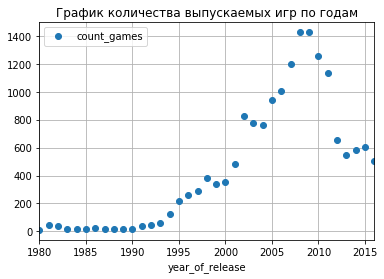

In [15]:
games_total_year = games.groupby(['year_of_release']).agg({'name': ['count']}).reset_index()
games_total_year.columns = ['year_of_release', 'count_games']
games_total_year.query('year_of_release > 0').plot(x = 'year_of_release', y = 'count_games', style='o', grid=True)
plt.title('График количества выпускаемых игр по годам')
plt.show()

In [16]:
#games_total_year.sort_values(by = 'count_games', ascending =False, inplace=True)
games_total_year

,year_of_release,count_games
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


### Вывод

Глядя на диаграму можно сделать вывод, что резкий рост объемов выпуска игрых приходится на 2002 год, значит анализировать данные возьмемся за период с 2002 по 2016 года

### Посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос  "За какой характерный срок появляются новые и исчезают старые платформы?".

In [17]:
#выбираем топ платформ с самыми высокими продажами
platforms = games.groupby('platform').agg({'sales': 'sum'})
platforms.sort_values(by = 'sales', inplace = True, ascending = False)
platforms.reset_index(inplace = True)
platforms

,platform,sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


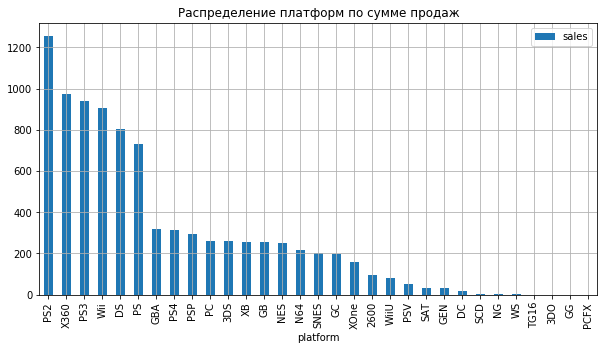

In [18]:
platforms.plot(x = 'platform', y = 'sales', kind = 'bar', figsize = (10, 5), grid=True)
plt.title('Распределение платформ по сумме продаж')
plt.show()

In [19]:
#выберем платформы с самыми большими продажами
platforms_max_sales = platforms.loc[:5]
platforms_max_sales.set_index(platforms_max_sales['platform'], inplace=True)
platforms_max_sales

,platform,sales
platform,,
PS2,PS2,1255.77
X360,X360,971.42
PS3,PS3,939.65
Wii,Wii,907.51
DS,DS,806.12
PS,PS,730.86


In [20]:
platforms_max_sales.index.unique()

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [21]:
#сделаем выборку по интересующим нас платформам
platforms_max_sales_year = games.query('platform in @platforms_max_sales.index and year_of_release > 0')
platforms_max_sales_year = platforms_max_sales_year.groupby(['platform', 'year_of_release']).agg({'sales': 'sum'})
platforms_max_sales_year.reset_index(inplace=True)
platforms_max_sales_year

,platform,year_of_release,sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


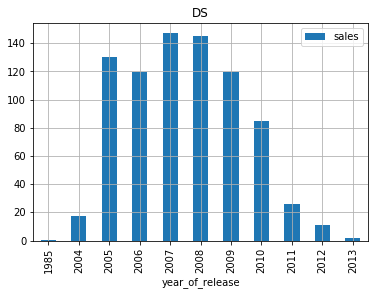

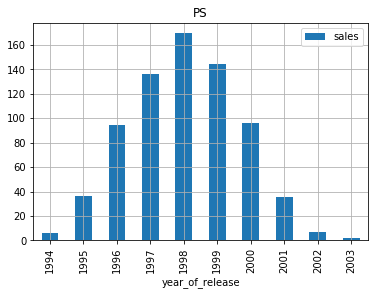

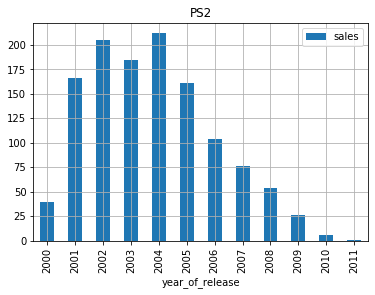

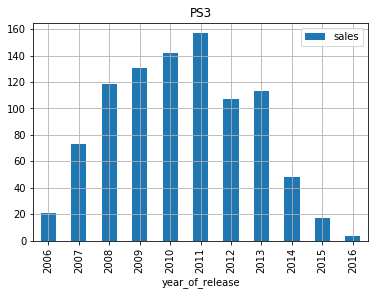

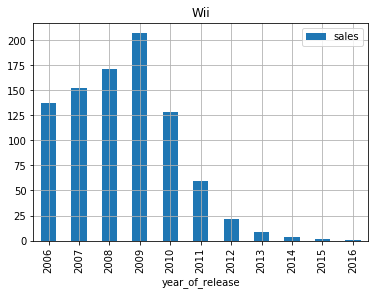

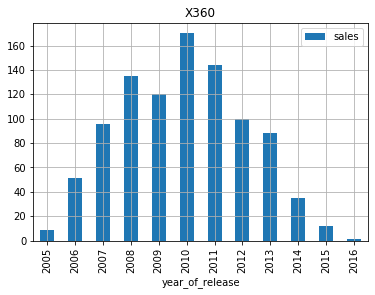

In [22]:
#для каждой из выбранных платформ построим графики распределния сумм продаж по годам
for platform, group_data in platforms_max_sales_year.groupby('platform'):
    group_data.plot(x = 'year_of_release', y = 'sales', title = platform, kind = 'bar', grid=True)

### Вывод
На данном шаге мы выбрали 5 самых дорогих по суммам продаж платформ за все года (их суммы от продаж за период превышают 700 млн.дол.). Затем проанализировали как респределялась выручка по годам для выбранных платформам. По диаграммам видно, что платформы в среднем за 10 лет успевают пройти все этапы развития (роста, расцвета, увядания)

**Выбираем актуальный период**

В качестве актуального периода возьмем года с 2002 года, так как в этом году был резкий скачок по объему выпускаеемых игр, по 2016 год, несмотря на то что в среднем период появления и исчезновения платформ 10-12 лет, нам необходима тенденция движения платформ за последние года, чтобы дать оценки на 2017 год

In [23]:
#делаем выборку по годам с 2002 по  2016
games_2_16 = games.query('year_of_release >= 2002  and year_of_release <= 2016')
games_2_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13638 entries, 0 to 16714
Data columns (total 12 columns):
name               13638 non-null object
platform           13638 non-null object
year_of_release    13638 non-null int64
genre              13638 non-null object
na_sales           13638 non-null float64
eu_sales           13638 non-null float64
jp_sales           13638 non-null float64
other_sales        13638 non-null float64
critic_score       7418 non-null float64
user_score         7007 non-null float64
rating             9176 non-null object
sales              13638 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


 Определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ

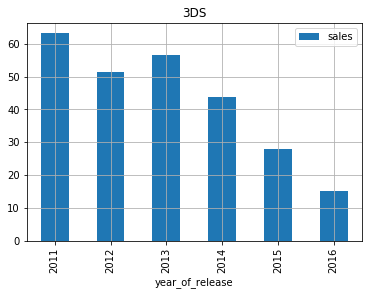

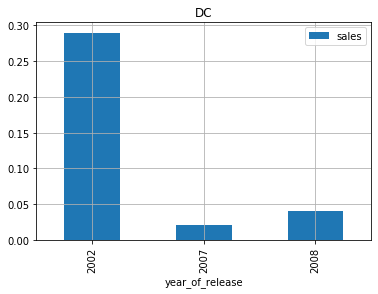

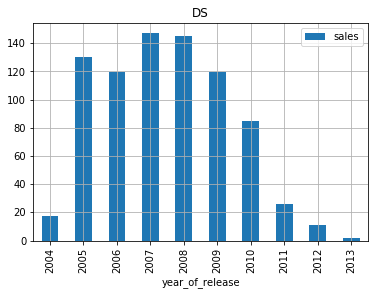

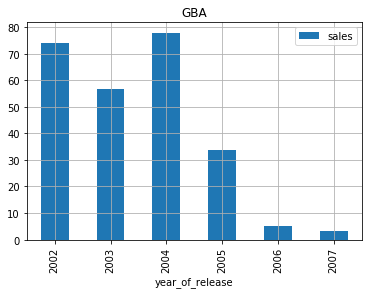

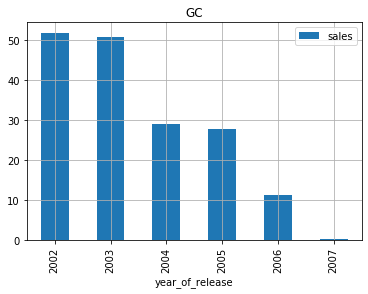

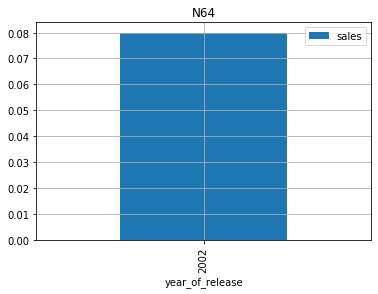

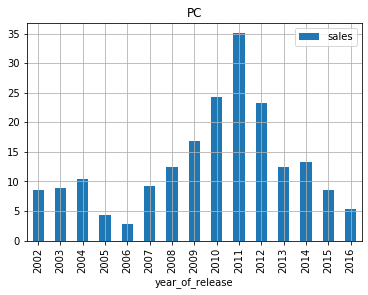

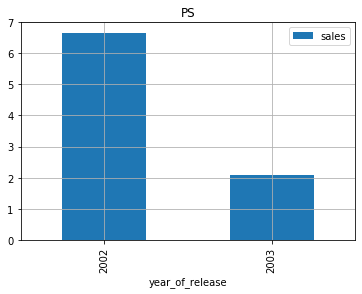

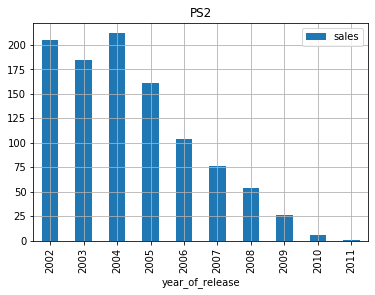

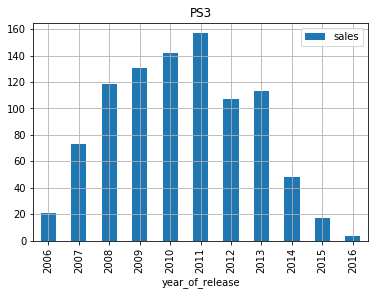

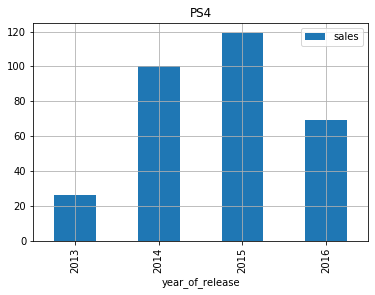

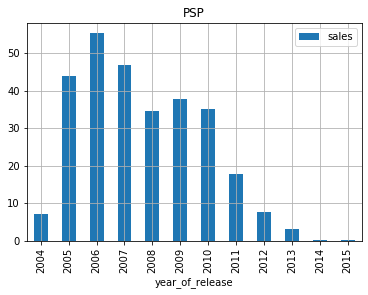

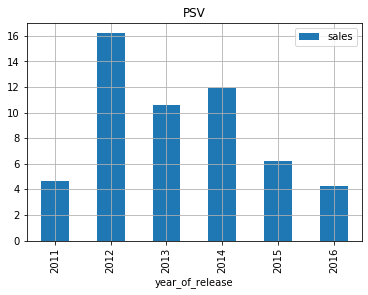

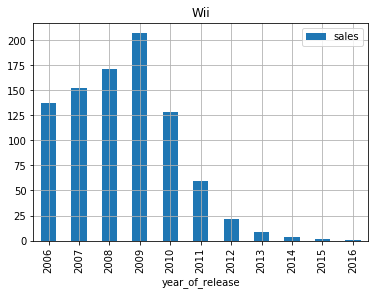

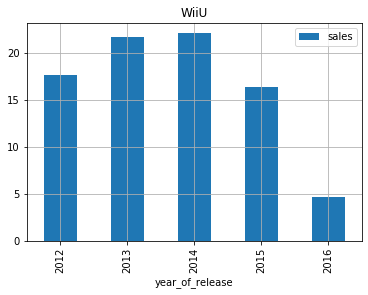

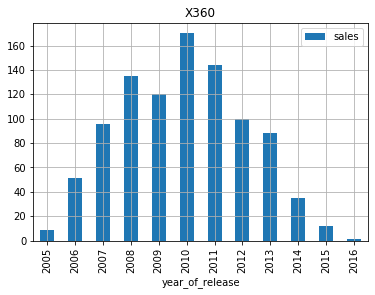

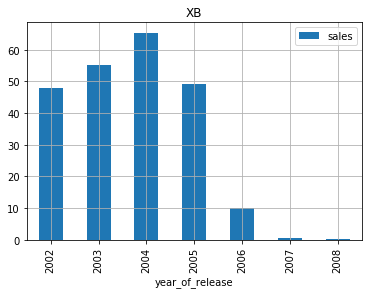

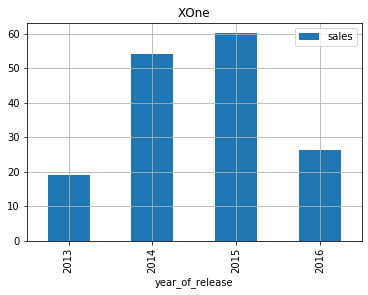

In [24]:
#сделаем выборку по платформам
platforms_potencial_year = games_2_16.groupby(['platform', 'year_of_release']).agg({'sales': 'sum'})
platforms_potencial_year.reset_index(inplace=True)
#для каждой из выбранных платформ построим графики распределния сумм продаж по годам
for platform, group_data in platforms_potencial_year.groupby('platform'):
    group_data.plot(x = 'year_of_release', y = 'sales', title = platform, kind = 'bar', grid=True)
    plt.show()

### Вывод

К потенциальным платформам можно отнести XOne и PS4, у остальных же платформ наблюдается резкий спад продаж к 2016году.

**Построим график «ящик с усами»**

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Ответим на вопросы "Велика ли разница в продажах? А в средних продажах на разных платформах?" Опишем результат.

In [25]:
#делаем срез по интересующим нас перспективным платформам
potencial_platforms = games_2_16.query('platform == "XOne" or platform == "PS4"')

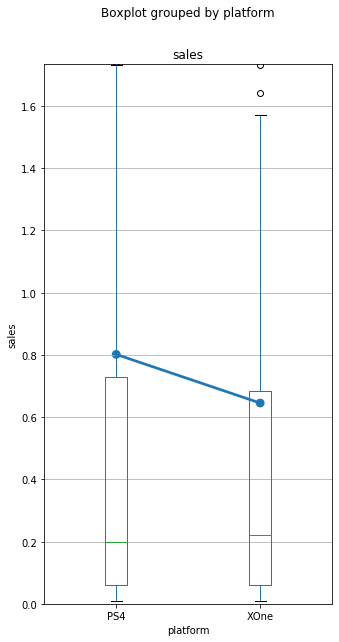

In [26]:
#делаем срез по интересующим нас перспективным платформам
potencial_platforms = games_2_16.query('platform == "XOne" or platform == "PS4"')
threshold = (
    potencial_platforms['sales'].quantile(0.75) 
    + (potencial_platforms['sales'].quantile(0.75) - potencial_platforms['sales'].quantile(0.25))
    * 1.5
)
#potencial_platforms
ax = potencial_platforms.boxplot(
    column = 'sales', by= 'platform', 
    positions=range(potencial_platforms.platform.unique().shape[0]),
    figsize =  (5, 10)
)
sns.pointplot(
    x='platform', y='sales', 
    data=potencial_platforms.groupby('platform', as_index=False).mean(),
    ci = 'sd',
    ax=ax)
plt.ylim(0, threshold)
plt.show()

Синяя линия, соединяющая два "ящика с усами" показывает средние продажи для каждой платформы

**Построим гистаграммы распределения продаж каждой из двух платформ, чтобы посмотреть разницу продаж в общем**

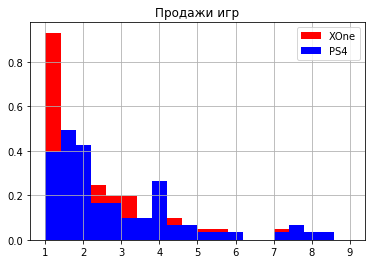

In [27]:
plt.hist(
    potencial_platforms.query('platform == "XOne"')['sales'], 
    bins = 20, 
    color = 'red', label = 'XOne', density=True,
    range=(1,9)
)
plt.hist(
    potencial_platforms.query('platform == "PS4"')['sales'],
    bins = 20,
    color = 'blue', label = 'PS4', density=True,
    range=(1,9)
)
plt.grid()
plt.legend(loc='upper right')
plt.title('Продажи игр')
plt.show()
#plt.hist(potencial_platforms.query('platform == "XOne"')['sales'], figsize =(15, 15))

In [28]:
potencial_platforms.query('platform == "XOne"')['sales'].describe() 

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales, dtype: float64

In [29]:
potencial_platforms.query('platform == "PS4"')['sales'].describe() 

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales, dtype: float64

### Вывод
По гистограмме видно, что общая тенденция выручек для обеих платформ приблизительно одинаковая, у платформы XOne сильно выделяются игры с очень низкой стоимостью продаж. График размаха, говорит о том, что средняя выручка от продаж выше у платформы PS4, несмотря на одинаковые медианы, такое происходит за счет редких очень высоких по сравнению с остальными значениями выручки. По медиане можно судить, что разницы в продажах двух платформ практически нет

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

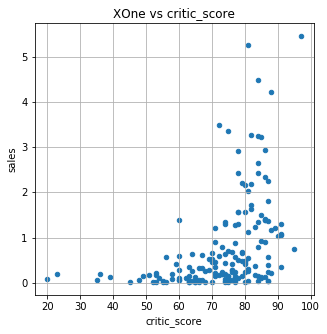

In [30]:
#рассмотрим как влияют оценки критиков на продажи игра платформы XOne
critic_score_XOne = potencial_platforms.query('platform == "XOne" and critic_score != "tbd"')
critic_score_XOne = critic_score_XOne.loc[:, ['platform', 'critic_score', 'sales']]
critic_score_XOne.plot(
    x = 'critic_score' , y  = 'sales', kind = 'scatter', figsize=(5.0,5.0),
    title = 'XOne vs critic_score', grid = True)
plt.show()

In [31]:
#зависимость продаж от оценки критиков платформы XOne
critic_score_XOne.corr()

,critic_score,sales
critic_score,1.000000,0.416998
sales,0.416998,1.000000


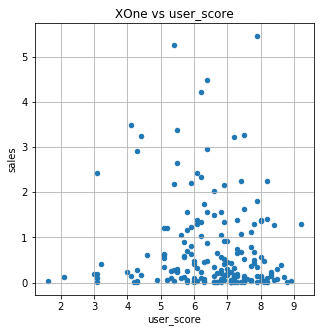

In [32]:
#рассмотрим как влияют оценки пользователей на продажи игра платформы XOne
user_score_XOne = potencial_platforms.query('platform == "XOne" and user_score != "tbd"')
user_score_XOne['user_score'] = pd.to_numeric(user_score_XOne['user_score'])
user_score_XOne = user_score_XOne.loc[:, ['platform', 'user_score', 'sales']]
user_score_XOne.plot(
    x = 'user_score' , y = 'sales', kind = 'scatter',
    figsize=(5.0,5.0), title = 'XOne vs user_score', grid = True
)
plt.show()

In [33]:
#зависимость продаж от оценки пользователей платформы XOne
user_score_XOne.corr()

,user_score,sales
user_score,1.000000,-0.068925
sales,-0.068925,1.000000


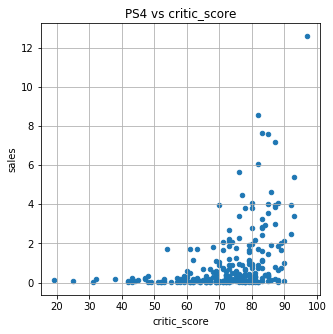

In [34]:
#рассмотрим как влияют оценки критиков на продажи игр платформы PS4
critic_score_PS4 = potencial_platforms.query('platform == "PS4" and critic_score != "tbd"')
critic_score_PS4 = critic_score_PS4.loc[:, ['platform', 'critic_score', 'sales']]
critic_score_PS4.plot(
    x = 'critic_score' , y  = 'sales', kind = 'scatter', figsize=(5.0,5.0),
    title = 'PS4 vs critic_score', grid = True)
plt.show()

In [35]:
#зависимость продаж от оценки критиков платформы PS4
critic_score_PS4.corr()

,critic_score,sales
critic_score,1.000000,0.406568
sales,0.406568,1.000000


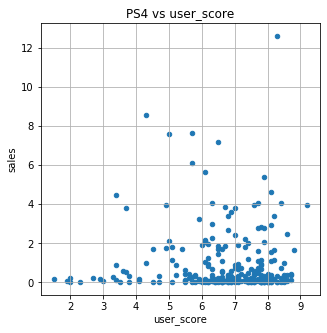

In [36]:
#рассмотрим как влияют оценки пользователей на продажи игра платформы PS4
user_score_PS4 = potencial_platforms.query('platform == "PS4" and user_score != "tbd"')
user_score_PS4['user_score'] = pd.to_numeric(user_score_PS4['user_score'])
user_score_PS4 = user_score_PS4.loc[:, ['platform', 'user_score', 'sales']]
user_score_PS4.plot(
    x = 'user_score' , y = 'sales', kind = 'scatter', figsize=(5.0,5.0),
    title = 'PS4 vs user_score', grid = True)
plt.show()

In [37]:
#зависимость продаж от оценки пользователей платформы PS4
user_score_PS4.corr()

,user_score,sales
user_score,1.000000,-0.031957
sales,-0.031957,1.000000


In [38]:
#проверим зависимость продаж остальных платформ от оценок пользователей и критик
other_platforms = games_2_16.query('platform != "PS4" and platform != "XOne" and user_score != "tbd"')
other_platforms_corr = other_platforms.loc[:, ['sales', 'user_score', 'critic_score']]
other_platforms_corr['user_score'] = pd.to_numeric(other_platforms_corr['user_score'])
other_platforms_corr.corr()

,sales,user_score,critic_score
sales,1.000000,0.082118,0.224610
user_score,0.082118,1.000000,0.579978
critic_score,0.224610,0.579978,1.000000


### Вывод

Глядя на диаграммы рассеивания и после вычисления коэффициента корреляции Пирсона видно, что на продажи обеих рассмтриваемых нами платформ оказывают влияние оценки критиков (существует прямая зависимость с к-том корреляции 0,4). Для остальных платформ, существует низкая зависимость между оценками и обемом продаж (к-т корреляции = 0,2)

### Посмотрим на общее распределение игр по жанрам

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

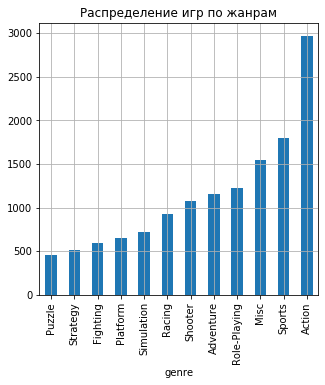

In [39]:
genres = games_2_16.groupby('genre').agg({'name': 'count'}).sort_values(by = 'name', ascending=True)
genres.plot(y = 'name', title = 'Распределение игр по жанрам', kind = 'bar', figsize = (5, 5), legend=False, grid=True)
plt.show()
#genres

Как видно из граффика, наиболее (в 1,5 раза выше) распростронен выпуск игр с жанром "Action", на втором месте "Sport"

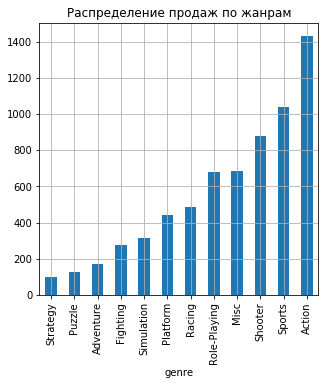

In [40]:
genres_sales = games_2_16.groupby('genre').agg({'sales': 'sum'}).sort_values(by = 'sales', ascending=True)
#genres_sales
genres_sales.plot(y = 'sales', title = 'Распределение продаж по жанрам', kind = 'bar', figsize = (5, 5), legend=False, grid = True)
plt.show()

Как видно из граффика игры с жанром "Action" снова лидирует, они являются наиболее популярны у пользователей и приносят наибольшую выручку относительно игр других жанров.

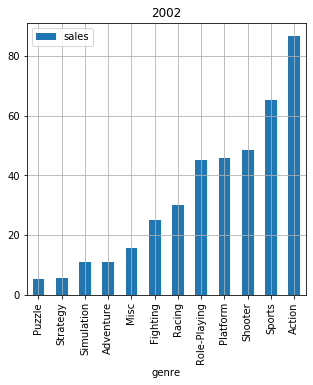

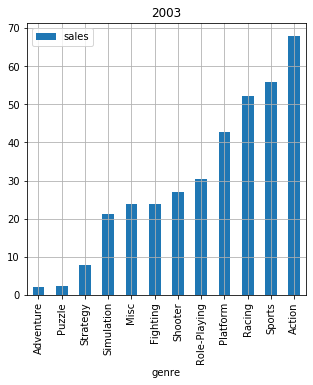

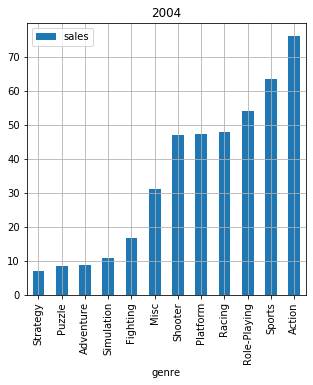

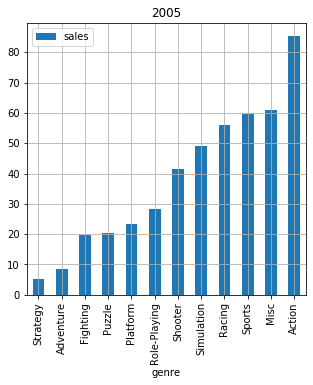

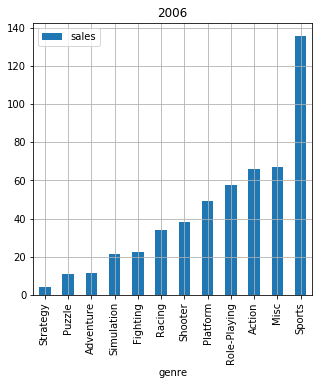

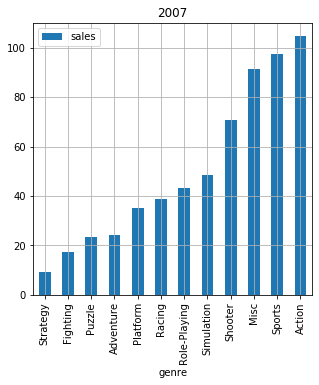

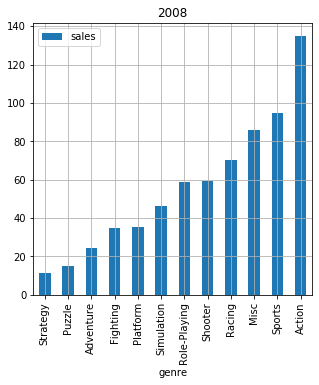

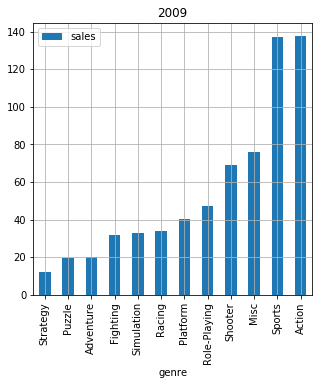

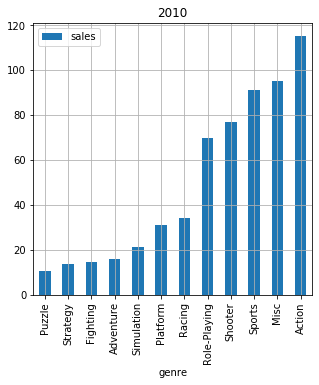

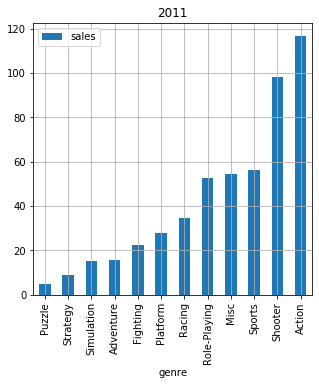

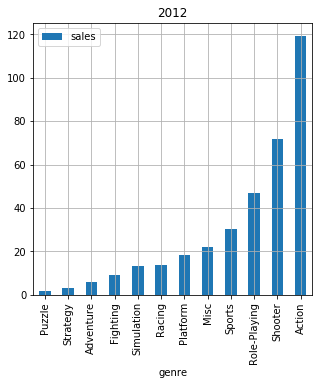

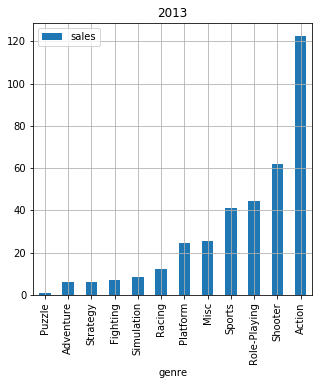

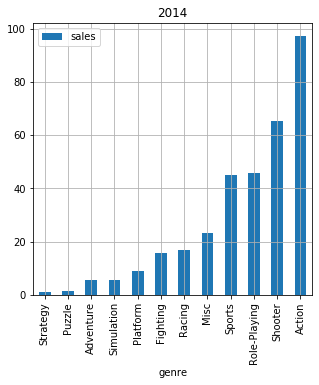

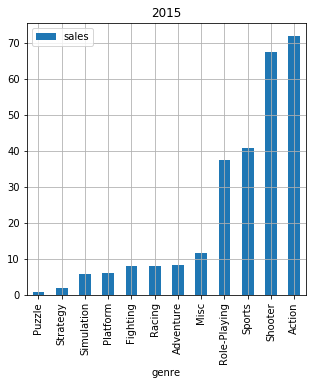

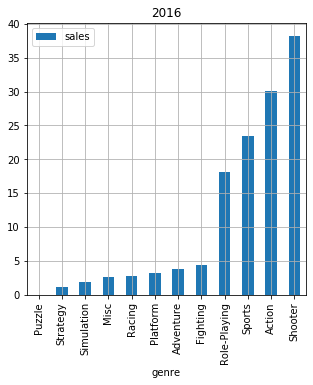

In [41]:
genres_sales_year = (
    games_2_16.groupby(['year_of_release', 'genre']).agg({'sales': 'sum'}).reset_index().sort_values(by = "sales")
)
#genres_sales_year.columns = ['sales']
genres_sales_year
for year_of_release, group_data in genres_sales_year.groupby('year_of_release'):
    group_data.plot(x = 'genre', y = 'sales', title = year_of_release, kind = 'bar', figsize = (5, 5), grid=True)
    plt.show()

Что касается жанра Action, то он занимает лидирующее место по продажам за весь анализируемый период, исключения составили 2006 год - максимальные продажи были у жанра Sport и 2016 - первое место занял жанр Shotter. Жанры 'Strategy', 'Adventure', 'Puzzle' - в общем имеют наиболее низвие продажи.

## Выводы

1. На данном этапе, основываясь на увеличении объемов продаж, мы выделили период с 2002 года по 2016 в качестве показательного, по которому и провели анализ некоторых харатеристик. 
2. Выделили в качестве перспективных платформ XOne и PS4. Так же было определено, что средние продажи у платформы PS4 за анализируемый период выше (0,8 млн.дол.), чем у платформы XOne (0.64 млн.дол).
3. Пришли к выводу, что существует средняя положительная корреляция между оценкой критиков и объемом продаж (к-т кор.=0,4), а вот от корреляция продаж от оценок пользователей стремится к нулю.
4. Среди жанров лидером многие годы являлся жанр Action, но к 2016 году он уступил первенство жанру Shooter. 

## 4. Составление портрета пользователя каждого региона

### Определяем для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). 
Опишите различия в долях продаж.

In [42]:
#выбираем топ-5 платформ для Северной Америки
na_platforms = (games_2_16
                    .pivot_table(index = 'platform',     
                                 values = ['na_sales'],
                                 aggfunc = 'sum')
                    .sort_values(by = 'na_sales', ascending = False)
                    .reset_index()
                    .loc[:4]
                )
na_platforms.set_index(['platform'], inplace = True)
na_platforms['per'] = (na_platforms['na_sales'] / (na_platforms['na_sales']).sum() * 100).round(1)
na_platforms

,na_sales,per
platform,,
X360,595.74,25.6
Wii,486.87,20.9
PS2,477.35,20.5
PS3,390.13,16.7
DS,380.31,16.3


In [43]:
#выбираем топ-5 платформ для Японии
jp_platforms = (games_2_16
                    .pivot_table(index = 'platform',     
                                 values = ['jp_sales'],
                                 aggfunc = 'sum')
                    .sort_values(by = 'jp_sales', ascending = False)
                    .reset_index()
                    .loc[:4]
                )
jp_platforms.set_index(['platform'], inplace = True)
jp_platforms

,jp_sales
platform,
DS,175.00
PS2,110.88
3DS,100.62
PS3,79.41
PSP,75.88


In [44]:
#выбираем топ-5 платформ для Европы
eu_platforms = (games_2_16
                    .pivot_table(index = 'platform',     
                                 values = ['eu_sales'],
                                 aggfunc = 'sum')
                    .sort_values(by = 'eu_sales', ascending = False)
                    .reset_index()
                    .loc[:4]
                )
eu_platforms.set_index(['platform'], inplace = True)
"""eu_platforms.plot(y = 'eu_sales', kind = 'pie', 
                  title = 'Топ-5 платформ Европы %',
                  autopct='%.1f', fontsize=15, 
                 legend = False)"""
eu_platforms

,eu_sales
platform,
PS3,327.21
PS2,269.62
X360,268.32
Wii,258.32
DS,188.41


### Вывод
Лидером продаж в Японии является платформа DS, в то время как в Северной Америки и Европе она занимает 5-е место. Пятерку лидеров в основ занимают одинаковые платформы с небольшим отклонением.

In [46]:
pd.concat([jp_platforms.reset_index(), 
           na_platforms.reset_index(), 
           eu_platforms.reset_index()], axis=1)

,platform,jp_sales,platform,na_sales,per,platform,eu_sales
0,DS,175.00,X360,595.74,25.6,PS3,327.21
1,PS2,110.88,Wii,486.87,20.9,PS2,269.62
2,3DS,100.62,PS2,477.35,20.5,X360,268.32
3,PS3,79.41,PS3,390.13,16.7,Wii,258.32
4,PSP,75.88,DS,380.31,16.3,DS,188.41


### Определяем для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). 


In [47]:
#выбираем топ-5 жанров для Европы
eu_genres = (games_2_16
                    .pivot_table(index = 'genre',     
                                 values = ['eu_sales'],
                                 aggfunc = 'sum')
                    .sort_values(by = 'eu_sales', ascending = False)
                    .reset_index()
                    .loc[:4]
                )
eu_genres.set_index(['genre'], inplace = True)
#eu_genres

In [48]:
#выбираем топ-5 жанров для Японии
jp_genres = (games_2_16
                    .pivot_table(index = 'genre',     
                                 values = ['jp_sales'],
                                 aggfunc = 'sum')
                    .sort_values(by = 'jp_sales', ascending = False)
                    .reset_index()
                    .loc[:4]
                )
jp_genres.set_index(['genre'], inplace = True)
#jp_genres

In [49]:
#выбираем топ-5 жанров для Северной Америки
na_genres = (games_2_16
                    .pivot_table(index = 'genre',     
                                 values = ['na_sales'],
                                 aggfunc = 'sum')
                    .sort_values(by = 'na_sales', ascending = False)
                    .reset_index()
                    .loc[:4]
                )
na_genres.set_index(['genre'], inplace = True)
#na_genres

In [51]:
pd.concat([jp_genres.reset_index(), 
           na_genres.reset_index(), 
           eu_genres.reset_index()], axis=1)

,genre,jp_sales,genre,na_sales,genre,eu_sales
0,Role-Playing,216.36,Action,704.67,Action,436.49
1,Action,122.50,Sports,537.84,Sports,315.67
2,Misc,81.40,Shooter,476.12,Shooter,284.35
3,Sports,65.62,Misc,348.17,Misc,187.55
4,Platform,49.17,Role-Playing,267.64,Racing,167.63


### Вывод
В Северной Америке и Европе распределение популярности жанров практиески одинаковое, за исключение последнего пункта. Лидирует все тот же что и по всему миру жанр Action. А вот Японии же огромную долю занимает Role-Playing.

### Определяем для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [52]:
rating = games_2_16.dropna(subset = ['rating'])
rating['rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [53]:
rating_sales = (rating
            .pivot_table(index = 'rating',     
                         values = ['na_sales', 'eu_sales','jp_sales',],
                         aggfunc = 'sum')
            .reset_index()
        )
rating_sales.set_index(['rating'], inplace = True)
rating_sales.sort_values(by = 'na_sales', ascending = False, inplace = True)
rating_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,630.17,175.38,1139.37
M,456.15,53.44,698.99
T,358.49,114.29,650.02
E10+,183.33,40.20,345.50
EC,0.11,0.00,1.53
AO,0.61,0.00,1.26
RP,0.03,0.00,0.00


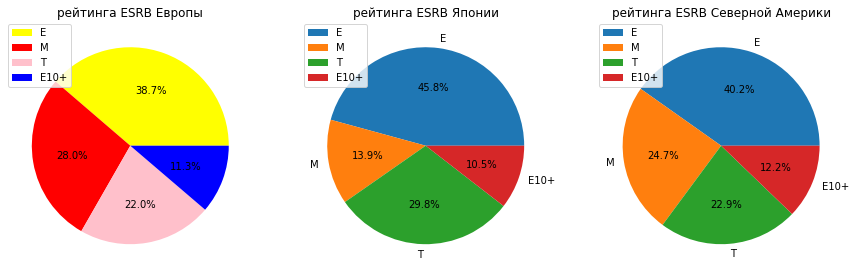

In [54]:
#строим круговые диаграммы для рейтинга ESRB в регионах, который максимально влияет на продажи
rating_sales_max = rating_sales.loc[:'E10+']
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].pie(rating_sales_max['eu_sales'], autopct='%.1f%%', colors=['yellow', 'red', 'pink', 'blue', 'orange'])
axs[0].legend(rating_sales_max.index, loc='upper left', borderaxespad=0.1)
axs[0].set_title('рейтинга ESRB Европы')
axs[1].pie(rating_sales_max['jp_sales'], autopct='%.1f%%', labels = ['E', 'M', 'T', 'E10+'])
axs[1].legend(rating_sales_max.index, loc='upper left', borderaxespad=0.1)
axs[1].set_title('рейтинга ESRB Японии')
axs[2].pie(rating_sales_max['na_sales'], autopct='%.1f%%', labels = ['E', 'M', 'T', 'E10+'])
axs[2].legend(rating_sales_max.index, loc='upper left', borderaxespad=0.1)
axs[2].set_title('рейтинга ESRB Северной Америки')
plt.show()

### Вывод

По результатам анализа на данном этапе у нас ложились следующие портреты геймеров по странам:
- для Северной Америки характерны пользователи, которые играют на платформе X360 в игры жанра Action, самые популярные игры по рейтингу ESRB являются те, что преднаначены для всех, т.е. от 6 и старше («E» («Everyone») — «Для всех»), далее «M» («Mature») — «Для взрослых»
- для Японии характерны игроки, которые используют платформу DS, игры жанра Role-Plaing, а самые популярные игры по рейтингу ESRB являются те, что преднаначены для всех, т.е. от 6 и старше («E» («Everyone») — «Для всех»), далее «T» («Teen») — «Подросткам»
- для Европы характерны геймеры, которые играют на платформе PS3 в игры жанра Action, самые популярные игры по рейтингу ESRB являются те, что преднаначены для всех, т.е. от 6 и старше («E» («Everyone») — «Для всех»), далее  как и в Северной Америке «M» («Mature») — «Для взрослых»

Таким образом, можно сделать вывод, что в Японии играют в основном подростки)

## Шаг 5. Проверка гипотез

### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [55]:
#посчитаем статистики для пользовательских рейтингов двух отдельных платформ
rating_statistic_ = (
    {'Statistics':
     ['Средние пользовательские рейтинги', 'Дисперсия', 'Стандартное отклонение'],
     'Xbox One': [0,0,0],
     'PC': [0,0,0]}
)
platforms_statistic = pd.DataFrame(rating_statistic_)

#выборки по платформам
xbox_one = (
    games_2_16.query('user_score != "tbd" and platform == "XOne"')
    .loc[:, ['platform', 'user_score']]
    .dropna()
)
xbox_one['user_score'] = pd.to_numeric(xbox_one['user_score'], errors = 'coerce')

pc = (
    games_2_16.query('user_score != "tbd" and platform == "PC"')
    .loc[:, ['platform', 'user_score']]
    .dropna()
)
pc['user_score'] = pd.to_numeric(pc['user_score'], errors = 'coerce')

#функция для расчета статистик
def parameters_s(data_1, data_2):
    if data_1 == 'Средние пользовательские рейтинги':
        return (data_2['user_score'].mean()).round(2)
    if data_1 == 'Дисперсия':
        return (np.var(data_2['user_score'], ddof = 1)).round(2)
    if data_1 == 'Стандартное отклонение':
        return (np.std(data_2['user_score'], ddof = 1)).round(2)
    
    
platforms_statistic['Xbox One'] = platforms_statistic['Statistics'].apply(parameters_s, args = [xbox_one])
platforms_statistic['PC'] = platforms_statistic['Statistics'].apply(parameters_s, args = [pc])
platforms_statistic.columns = pd.MultiIndex.from_product([['Статистики для пользовательского рейтинга платформ'], platforms_statistic.columns])
platforms_statistic

Статистики для пользовательского рейтинга платформ               
                                          Statistics Xbox One    PC
0                  Средние пользовательские рейтинги     6.52  7.00
1                                          Дисперсия     1.91  2.32
2                             Стандартное отклонение     1.38  1.52

#### Формулируем нулевую гипотезу: средние двух выборок по пользователским рейтингам платформ XboxOne и PC равны между собой.
Если нулевая гипотеза не подтвердится, то будет верна альтернативная гипотеза о неравенстве рейтингов

In [56]:
#посчитаем статистики для пользовательских рейтингов двух отдельных жанров
alpha = 0.5 #уровень значимости
results = st.ttest_ind(
    xbox_one['user_score'], 
    pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00010751995267217297
Отвергаем нулевую гипотезу


### Вывод
Нулевая гипотеза о равенстве пользовательских рейтингов двух платформ опровергнута, что дает нам право предполагать их неравентсво.  Для проверки правдоподобия статистической гипотезы использовался t-критерий Стюдента для независимых выборок

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

In [57]:
#посчитаем статистики для пользовательских рейтингов двух отдельных жанров
rating_statistic_g = (
    {'Statistics':
     ['Средние пользовательские рейтинги', 'Дисперсия', 'Стандартное отклонение']}
)
genre_statistic = pd.DataFrame(rating_statistic_g)

#выборки по жанрам
action = (
    games_2_16.query('user_score != "tbd" and genre == "Action"')
    .loc[:, ['genre', 'user_score']]
    .dropna()
)
action['user_score'] = pd.to_numeric(action['user_score'], errors = 'coerce')

sports = (
    games_2_16.query('user_score != "tbd" and genre == "Sports"')
    .loc[:, ['platform', 'user_score']]
    .dropna()
)
sports['user_score'] = pd.to_numeric(sports['user_score'], errors = 'coerce')

#рассчитываем статистики рейтингов по жанрам
genre_statistic['Action'] = genre_statistic['Statistics'].apply(parameters_s, args = [action])
genre_statistic['Sports'] = genre_statistic['Statistics'].apply(parameters_s, args = [sports])
genre_statistic.columns = pd.MultiIndex.from_product([['Статистики для пользовательского рейтинга жанров'], genre_statistic.columns])
genre_statistic

Статистики для пользовательского рейтинга жанров              
                                        Statistics Action Sports
0                Средние пользовательские рейтинги   7.04   6.90
1                                        Дисперсия   1.98   2.66
2                           Стандартное отклонение   1.41   1.63

#### Формулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная (требуемая) гипотеза о неравенстве рейтингов будет подтверждена, если будет отвергнута нулевая гипотеза.

In [58]:
#посчитаем статистики для пользовательских рейтингов двух отдельных жанров
alpha = 0.05 #уровень значимости
results_2 = st.ttest_ind(
    action['user_score'], 
    sports['user_score'])

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.021856947776548855
Отвергаем нулевую гипотезу


### Вывод
Нулевая гипотеза о равенстве пользовательских рейтингов двух жанром опровергнута, что подтверждает нашу альтернативную гипотезу об их неравентсве.  Для проверки правдоподобия статистической гипотезы использовался t-критерий Стюдента для независимых выборок

## Шаг 6. Общий вывод

В ходе проведения работы были изучены предоставленные данные на предмет типа данных и имеющихся пустых значений. Были изучены года выпусков игр и выявлен резкий скачок вверх в 2002 году по количеству выпущенных игр (2001г - 482, 2002г - 829). 

За весь предоставленный период были проанализированы все продажи по всем платформам, лидирующими оказали PS2 и X360. Однако при дальнейшем анализе данных в период с 2002 по 2016 перспективными платформами были выделены XOne и PS4, так как до 2016 года продажи по этим платформам только росли. Средние продажи у платформы PS4 за анализируемый период составили 0,8 млн.дол., у платформы XOne - 0.64 млн.дол.

Далее было проанализировано влияние отзывов и на объемы продаж по выбранным платформам и по всем остальным, выявлена единая тенденция: существует средняя положительная корреляция между оценкой критиков и объемом продаж (к-т кор.=0,4), а вот от корреляция продаж от оценок пользователей стремится к нулю.

При анализе влияния жанров на выпуск игр, выявлено, что самыми популярными в мире являются Action (за период с 2002 по 2016 выпущено 2968 игр) и Sports (выпущено 1802 ирг). Что касается продаж, что эти же жанры так же лидируют:  Action продал игр на сумму 1400 млн.дол, Sports - 1040 млн.дол. Так же выявлено, что положительную тенденцию роста продаж имеет жанр Shooter, этот жанр можно назвать перспективным для 2017 года.

При анализе жанров, платформ и рейтинга ESRB в регионах можно был сделан вывод, что геймерский рынок Японии сильно отличается от рынка Европы и Северной Америки по своим предпочтениями и категориям лиц, которы чаще играют в игры. 

Эту информацию надо учитывать при планировании состава и структуры продаж.

Также были выдвинуты гипотезы о равенстве пользовательских рейтингов платфоры Xone и PC - не подтверждена, о неравенстве пользовательских рейтингов по жанру Action и Sports - подтверждена.

### Для компании Стримчик можно предложить следующие рекомендации: 
- упор рекламной кампании сделать на игры с более высокими оценками критиков жанров Action и Sports у платформ XOne и SP4;
- так же рекламу необходимо планировать порегионально, для Японии, например, больше подойдут игры с рейтингом ESRB "Подросткам" жанра Role-Plaing на платформу DS. Для Северной Америки и Европы  - игры жанра Action платформ X360 и PS4 с рейтингом ESRB "Для взрослых"/"Для всех".